# Text Detection and Identification Sample

In [2]:
from modules.text import *

## get_text_attributes()
This can be used to get the coordinates of text in the image, the text content, and identify attributes specific to breast ultrasound.

### Parameters

Takes in the filepath to an image and a boolean "show_thresh". If "show_thresh" is True, you can see the full process of text identification, as well as the bounding boxes for identified text.


raw scanned text:
mln lt breast 3.30 4 cm fn rad #2

laterality matches:  ['lt']
new text: mln  breast 3.30 4 cm fn rad #2

orientation matches:  ['rad']
new text: mln   3.30 4 cm fn  #2

cmfn matches:  ['4 cm fn']
new text: mln   3.30   #2

clock matches:  ['3.30']
alt clock matches (3 digits ex.600):  []
new text: mln      #2

results from each box:
top left: [619 118], bottom right: [646 118], text: Mln
top left: [ 61 331], bottom right: [396 331], text: LT BREAST 3.30 4 CM FN RAD #2

attributes array:
['LEFT', 'RADIAL', '4 CMFN', '3:30', '0', '0', '0', 'mln #2', 'Mln LT BREAST 3.30 4 CM FN RAD #2']
[laterality, orientation, cmfn, clock position, axilla flag, lesion dist measurement flag, prodecural imaging flag, misc, full string]


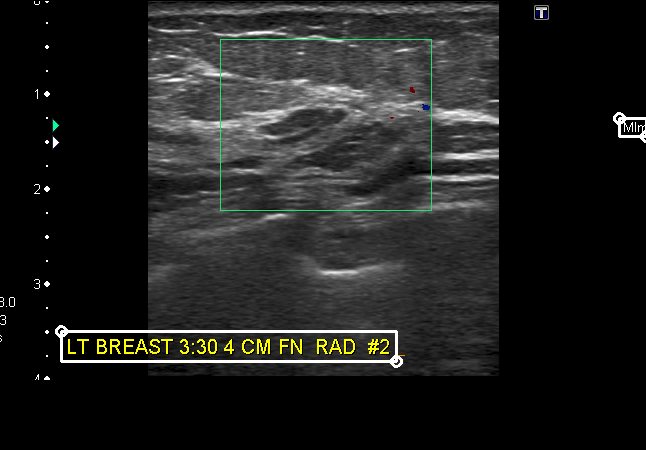

In [3]:
text_results = get_text_attributes('sample_data/image_2.png', show_thresh=True)

### Return Values

The result is an array containing the coordinates of the text fields, the original text, and the attribute array

In [4]:
print("coords: ", text_results[0])
print("\noriginal text: ", text_results[1])
print("\nresults: ", text_results[2])

coords:  [[array([619, 118]), array([646, 118]), array([646, 136]), array([619, 136])], [array([ 61, 331]), array([396, 331]), array([396, 361]), array([ 61, 361])]]

original text:  Mln LT BREAST 3.30 4 CM FN RAD #2

results:  ['LEFT', 'RADIAL', '4 CMFN', '3:30', '0', '0', '0', 'mln #2', 'Mln LT BREAST 3.30 4 CM FN RAD #2']


## Attributes Array Key
[laterality, orientation, cmfn, clock position, axilla flag, lesion dist measurement flag, prodecural imaging flag, misc, full string]

#### Index 0: Laterality - "LEFT" RIGHT"
#### Index 1: Transducer orientation - "ANTIRADIAL" "RADIAL" TRANSVERSE" "SAGITTAL" "OBLIQUE"
#### Index 2: Centimeters from nipple (CMFN) - "X CMFN"
#### Index 3: Clock position in analog
#### Index 4: Axilla flag - 1/0
#### Index 5: Lesion distance annotation measurement flag - 1/0
#### Index 6: Procedural imaging flag - 1/0
#### Index 7: Miscellaneous text that doesn't fall into the previous categories
#### Index 8: Full string

## Constraints

#### CMFN (index 2)
* Can be detected in a variety of ways as long as there is a number in front of it: cmfn, cm/n, ftn, fn, cmn, cm ftn, cfn. Does NOT take CM
* Can account for decimals (.) and dashes (-) ex. "3.5 cmfn" or "4-5 cmfn"
* There is some leeway for numbers incorrectly scanned as characters due to cropped text s=5 and a=4

Sometimes there are multiple measurements given for CMFN and both will be included in the results ex. "3-5 cmfn" -> "3-5 CMFN" or "3.1-3.5 cmfn" --> "3.1-3.5 CMFN". HOWEVER, in the following cases, ONLY THE SECOND MEASUREMENT is taken:
* If a divider other than "-" is used. ("5/8 cmfn" -> "8 CMFN")
* If decimals are inconsistent ("4 - 5.0 cmfn" -> "5 CMFN")
* If there is unusual spacing ("8 . 5 cmfn" -> "5 CMFN")
* If there are two values and the first is 0 ("0-6 cmfn" -> "6 CMFN")

#### Clock (index 3)
* Can account for text written as "X O'clock"
* Can account for 30 minutes if present
* If there are multiple clock values, the last one is returned

#### Lesion Measurement Flag (index 5)
* Can accept both "cm" and "mm"

#### Procedural Imaging Flag (index 6)
* Accepts the following: bx, biop, stereo, marquee, core, tru, pass, fire, celero, pre, post, slp, coil, ribbon, wing, bard, twirl, clip, tumark, vision

## Other examples


raw scanned text:
marquee 146 pass 1 prefire 4.0 - teft rreast 4.00 3cm fn rad

laterality matches:  ['teft']
new text: marquee 146 pass 1 prefire 4.0 -  rreast 4.00 3cm fn rad

orientation matches:  ['rad']
new text: marquee 146 pass 1 prefire 4.0 -   4.00 3cm fn 

cmfn matches:  ['3cm fn']
new text: marquee 146 pass 1 prefire 4.0 -   4.00  

clock matches:  ['4.00']
alt clock matches (3 digits ex.600):  []
new text: marquee 146 pass 1 prefire 4.0 -     

procedural imaging match:  marquee
new text:  146 pass 1 prefire 4.0 -     

procedural imaging match:  pass
new text:  146  1 prefire 4.0 -     

procedural imaging match:  fire
new text:  146  1 pre 4.0 -     

procedural imaging match:  prefire
new text:  146  1  4.0 -     

results from each box:
top left: [293 602], bottom right: [846 602], text: MARQUEE 146 PASS 1 PREFIRE 4.0 - Teft Rreast 4.00 3CM FN Rad

attributes array:
['LEFT', 'RADIAL', '3 CMFN', '4:00', '0', '0', '1', '146 1 4.0 -', 'MARQUEE 146 PASS 1 PREFIRE 4.0 - Tef

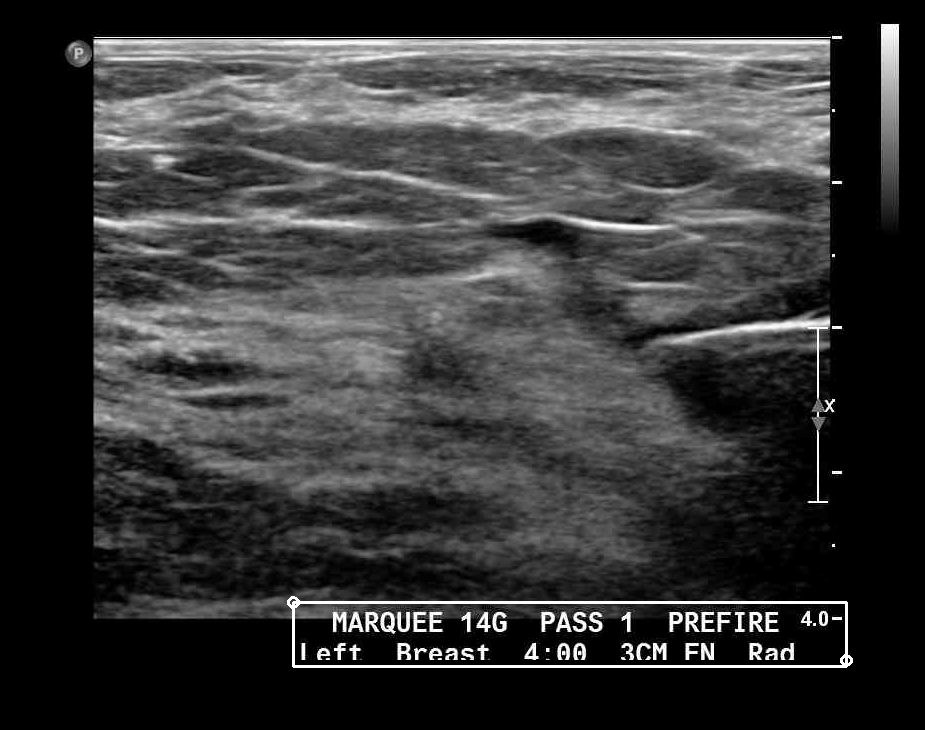

In [5]:
text_results = get_text_attributes('sample_data/image_3.png', show_thresh=True)

In [6]:
print("coords: ", text_results[0])
print("original text: ", text_results[1])
print("results: ", text_results[2])

coords:  [[array([293, 602]), array([846, 602]), array([846, 660]), array([293, 666])]]
original text:  MARQUEE 146 PASS 1 PREFIRE 4.0 - Teft Rreast 4.00 3CM FN Rad
results:  ['LEFT', 'RADIAL', '3 CMFN', '4:00', '0', '0', '1', '146 1 4.0 -', 'MARQUEE 146 PASS 1 PREFIRE 4.0 - Teft Rreast 4.00 3CM FN Rad']



raw scanned text:
m cm
new text: m cm

lesion dist matches (cm):  ['cm']
new text: 

clock matches:  []
alt clock matches (3 digits ex.600):  []
new text: 

results from each box:
top left: [  0 350], bottom right: [ 20 350], text: m cm

attributes array:
['', '', '', '', '0', '1', '0', '', 'm cm']
[laterality, orientation, cmfn, clock position, axilla flag, lesion dist measurement flag, prodecural imaging flag, misc, full string]


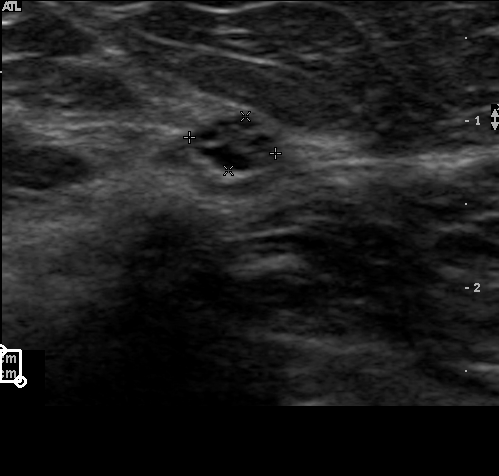

In [7]:
text_results = get_text_attributes('sample_data/image_4.png', show_thresh=True)

In [8]:
print("coords: ", text_results[0])
print("original text: ", text_results[1])
print("results: ", text_results[2])

coords:  [[array([  0, 350]), array([ 20, 350]), array([ 20, 381]), array([  0, 381])]]
original text:  m cm
results:  ['', '', '', '', '0', '1', '0', '', 'm cm']


## Bad Example #1

While the methods used account for cut off text, there are some situations where this might not be the case. In this, the "0400" (4:00) is read as "a4a0", leading to the clock position to not be recognized. 

In similar situations, a string will be registered as a clock position if the numbers that are supposed to be 0s are consistent ex. 9qq, 900, 9aa will match but not a mix like 9q0 or a4a0 like in this example.


raw scanned text:
1.24 cm 3.5" riaht rrfast a4a0 pfrtarfoi ar rad

laterality matches:  ['riaht']
new text: 1.24 cm 3.5"  rrfast a4a0 pfrtarfoi ar rad

orientation matches:  ['rad']
new text: 1.24 cm 3.5"   a4a0 pfrtarfoi ar 
new text: 1.24 cm 3.5"   a4a0 pfrtarfoi ar 

lesion dist matches (cm):  ['cm']
new text:  3.5"   a4a0 pfrtarfoi ar 

clock matches:  []
alt clock matches (3 digits ex.600):  []
new text:  3.5"   a4a0 pfrtarfoi ar 

results from each box:
top left: [ 17 469], bottom right: [108 469], text: 1.24 cm
top left: [797 584], bottom right: [841 584], text: 3.5"
top left: [ 38 635], bottom right: [641 635], text: Riaht RRFAST a4a0 PFRTARFOI AR RAD

attributes array:
['RIGHT', 'RADIAL', '', '', '0', '1', '0', '3.5" a4a0 pfrtarfoi ar', '1.24 cm 3.5" Riaht RRFAST a4a0 PFRTARFOI AR RAD']
[laterality, orientation, cmfn, clock position, axilla flag, lesion dist measurement flag, prodecural imaging flag, misc, full string]


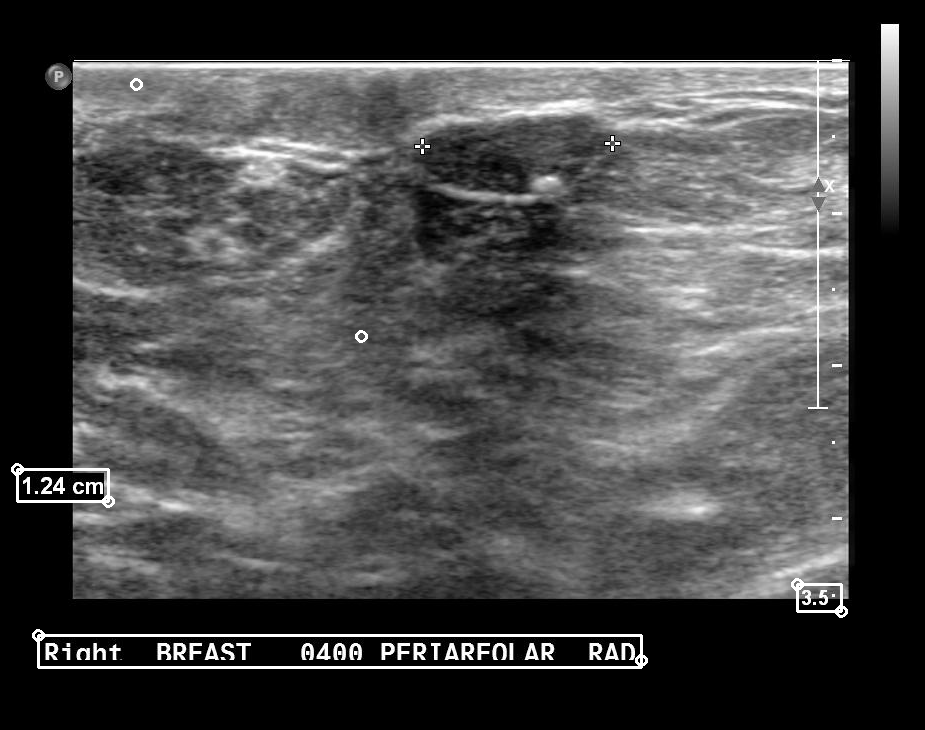

In [9]:
text_results = get_text_attributes('sample_data/image_5.png', show_thresh=True)

In [10]:
print("coords: ", text_results[0])
print("original text: ", text_results[1])
print("results: ", text_results[2])

coords:  [[array([ 17, 469]), array([108, 469]), array([108, 501]), array([ 17, 501])], [array([797, 584]), array([841, 584]), array([841, 611]), array([797, 611])], [array([ 38, 635]), array([641, 635]), array([641, 660]), array([ 38, 667])]]
original text:  1.24 cm 3.5" Riaht RRFAST a4a0 PFRTARFOI AR RAD 2
results:  ['RIGHT', 'RADIAL', '', '', '0', '1', '0', '3.5" a4a0 pfrtarfoi ar', '1.24 cm 3.5" Riaht RRFAST a4a0 PFRTARFOI AR RAD']


## Bad Example #2

There are also times where the text recognition pipeline may mistakenly identify lesion annotations or random white spots in the tissue as text. While there are precautions to filter out strings that don't look like real words, some like in this example may slip through. The calipers here got identified as "+ 4 . . +"


raw scanned text:
1.0) 2+ 4 . . + 18l7 difft13.0 cf 6.1 11 fps
new text: 1.0) 2+ 4 . . + 18l7 difft13.0 cf 6.1 11 fps

clock matches:  []
alt clock matches (3 digits ex.600):  []
new text: 1.0) 2+ 4 . . + 18l7 difft13.0 cf 6.1 11 fps

results from each box:
top left: [  0 154], bottom right: [ 38 154], text: 1.0) 2+
top left: [135 160], bottom right: [191 160], text: 4 . . +
top left: [265 277], bottom right: [320 277], text: 18L7 diffT13.0 CF 6.1 11 fps

attributes array:
['', '', '', '', '0', '0', '0', '1.0) 2+ 4 . . + 18l7 difft13.0 cf 6.1 11 fps', '1.0) 2+ 4 . . + 18L7 diffT13.0 CF 6.1 11 fps']
[laterality, orientation, cmfn, clock position, axilla flag, lesion dist measurement flag, prodecural imaging flag, misc, full string]


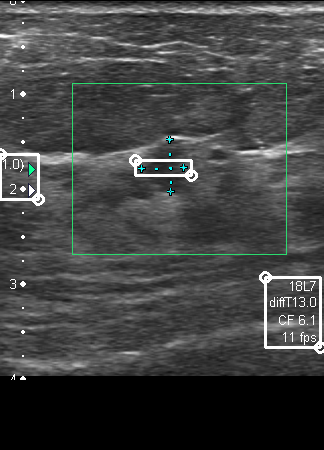

In [11]:
text_results = get_text_attributes('sample_data/image_1.png', show_thresh=True)

In [12]:
print("coords: ", text_results[0])
print("original text: ", text_results[1])
print("results: ", text_results[2])

coords:  [[array([  0, 154]), array([ 38, 154]), array([ 38, 199]), array([  0, 199])], [array([135, 160]), array([191, 160]), array([191, 175]), array([135, 175])], [array([265, 277]), array([320, 277]), array([320, 347]), array([265, 347])]]
original text:  1.0) 2+ 4 . . + 18L7 diffT13.0 CF 6.1 11 fps
results:  ['', '', '', '', '0', '0', '0', '1.0) 2+ 4 . . + 18l7 difft13.0 cf 6.1 11 fps', '1.0) 2+ 4 . . + 18L7 diffT13.0 CF 6.1 11 fps']


## text_helper()

A helper function for get_text_attributes(). It can be used for testing and only returns the result array with the location or original text. This removes the optical character recognition component of the text pipeline. Along with speeding up testing, it also allows a different tool than EasyOCR to be used.

### Parameters

Takes in an array of strings. In actual use, each element in the array is a group of text, but when using this for testing, it's okay to put the full string in a single element. If "show_thresh" is True, you can see the full process of text identification.

In [14]:
text_results = text_helper(["Mln LT BREAST 3.30 4 CM FN RAD #2"], True)


raw scanned text:
mln lt breast 3.30 4 cm fn rad #2

laterality matches:  ['lt']
new text: mln  breast 3.30 4 cm fn rad #2

orientation matches:  ['rad']
new text: mln   3.30 4 cm fn  #2

cmfn matches:  ['4 cm fn']
new text: mln   3.30   #2

clock matches:  ['3.30']
alt clock matches (3 digits ex.600):  []
new text: mln      #2


In [15]:
print(text_results)

['LEFT', 'RADIAL', '4 CMFN', '3:30', '0', '0', '0', 'mln #2', 'Mln LT BREAST 3.30 4 CM FN RAD #2']
